In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,Input

In [10]:
import os
import pandas as pd
import numpy as np

In [11]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [12]:
def create_dataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [13]:
train = pd.DataFrame()
train['image'], train['label'] = create_dataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [14]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [15]:
test = pd.DataFrame()
test['image'], test['label'] = create_dataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [16]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [17]:
from tqdm.notebook import tqdm

In [18]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [19]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [20]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [21]:
x_train = train_features/255.0
x_test = test_features/255.0

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [24]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [25]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [26]:
input_shape = (48, 48, 1)
model = Sequential()
model.add(Input(shape=input_shape))

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# Output layer
model.add(Dense(7, activation='softmax')) # Assuming 7 classes for emotion recognition

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x= x_train, y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.2361 - loss: 1.8393 - val_accuracy: 0.2583 - val_loss: 1.8151
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.2492 - loss: 1.8157 - val_accuracy: 0.2583 - val_loss: 1.8089
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.2514 - loss: 1.8067 - val_accuracy: 0.3102 - val_loss: 1.7025
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.3006 - loss: 1.7124 - val_accuracy: 0.3637 - val_loss: 1.5782
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.3628 - loss: 1.6142 - val_accuracy: 0.4411 - val_loss: 1.4533
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.4179 - loss: 1.5044 - val_accuracy: 0.4768 - val_loss: 1.3517
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.4419 - loss: 1.4509 - val_accuracy: 0.4941 - val_loss: 1.3104
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.4553 - loss: 1.4116 - 

In [29]:
model_json = model.to_json()
with open("faceemotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("faceemotiondetector.h5")

In [30]:
from keras.models import model_from_json

In [31]:
with open("faceemotiondetector.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("faceemotiondetector.h5")

In [32]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Continue training from a specific epoch (epoch 67)
history_continued = loaded_model.fit(
    x=x_train, 
    y=y_train, 
    batch_size=128, 
    epochs=100,  # Total epochs including the resumed epochs
    initial_epoch=67,  # Start from epoch 67
    validation_data=(x_test, y_test)
)

Epoch 68/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.7081 - loss: 0.8002 - val_accuracy: 0.6216 - val_loss: 1.0491
Epoch 69/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.7180 - loss: 0.7759 - val_accuracy: 0.6295 - val_loss: 1.0406
Epoch 70/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.7090 - loss: 0.7818 - val_accuracy: 0.6326 - val_loss: 1.0313
Epoch 71/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.7155 - loss: 0.7665 - val_accuracy: 0.6292 - val_loss: 1.0398
Epoch 72/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.7184 - loss: 0.7685 - val_accuracy: 0.6275 - val_loss: 1.0471
Epoch 73/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.7260 - loss: 0.7657 - val_accuracy: 0.6258 - val_loss: 1.0395
Epoch 74/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.7218 - loss: 0.7554 - val_accuracy: 0.6282 - val_loss: 1.0343
Epoch 75/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.7204 - loss: 0

In [33]:
model_json = model.to_json()
with open("faceemotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("faceemotiondetector.h5")

In [34]:
from keras.models import model_from_json

In [35]:
json_file = open("faceemotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("faceemotiondetector.h5")

In [36]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [37]:
def ef(image):
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image of an Happy face
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model prediction is: happy


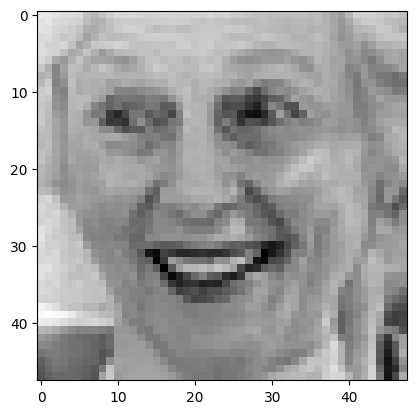

In [40]:
image = 'images/train/happy/25.jpg'
print("Original image of an Happy face")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image of an Sad face
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Model prediction is: sad


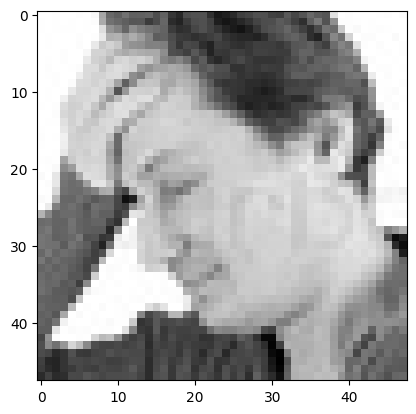

In [41]:
image = 'images/train/sad/72.jpg'
print("Original image of an Sad face")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image of an Surprise face
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Model prediction is: surprise


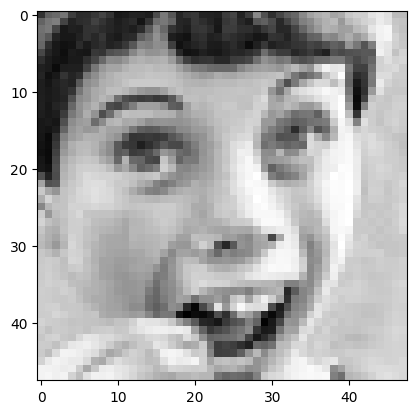

In [42]:
image = 'images/train/surprise/88.jpg'
print("Original image of an Surprise face")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image of an Angry face
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Model prediction is: angry


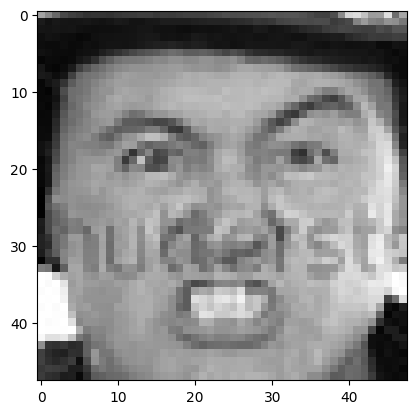

In [48]:
image = 'images/train/angry/76.jpg'
print("Original image of an Angry face")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image of an Fear face
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model prediction is: fear


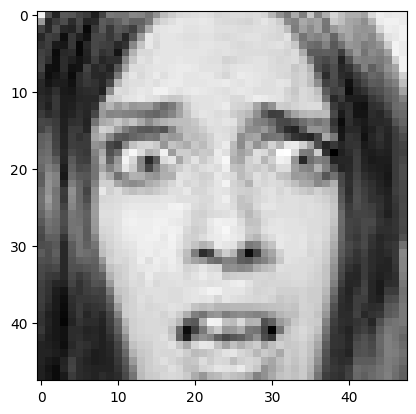

In [44]:
image = 'images/train/fear/96.jpg'
print("Original image of an Fear face")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image of an Disgust face
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model prediction is: disgust


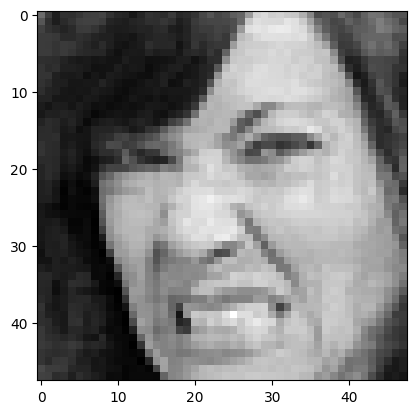

In [45]:
image = 'images/train/disgust/388.jpg'
print("Original image of an Disgust face")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image of an Neutral face
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model prediction is: neutral


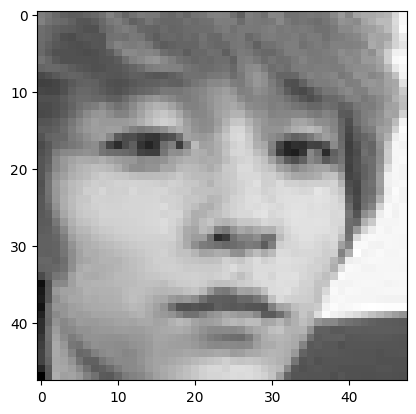

In [46]:
image = 'images/train/neutral/13.jpg'
print("Original image of an Neutral face")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')